In [101]:
#import packages 

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats import linregress

In [131]:
ds = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'foram_cocco_workup')

data = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'COMPILED DATASET', header =1)

df = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'omegac_workup', header =1)


In [157]:
z = ds['depth ']
ff = ds['fraction of CaCO3 in forams']
cf = ds['fraction of CaCO3 in cocco']
fm = ds['foram mass in sample']
cm = ds['Coccolithophores mass in sample']
fc = ds['d13C foram']
cc = ds['d13C cocco']


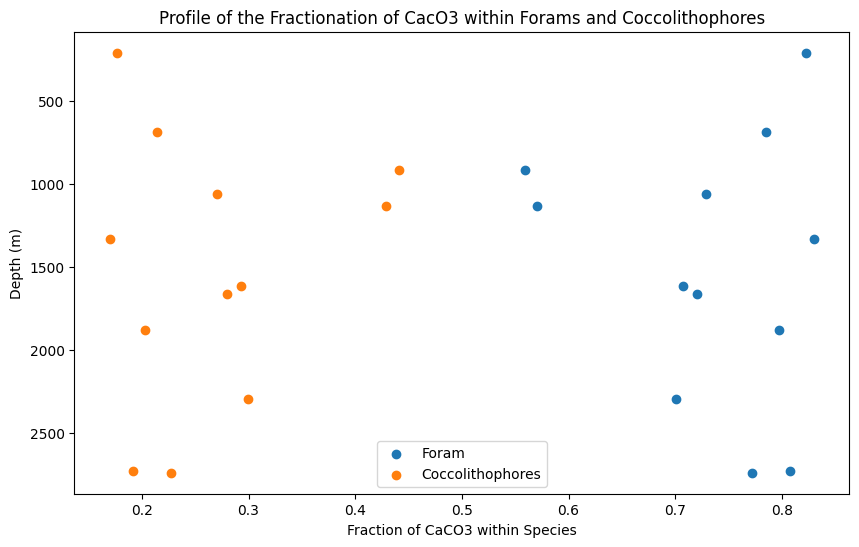

In [161]:
#foram fraction and cocco fraction vs depth 

plt.figure(figsize = (10,6))

plt.scatter(ff,z, label = 'Foram')
plt.scatter(cf,z, label = 'Coccolithophores')

# # calulate linear regression
# #foram
# slopef, interceptf, r_valuef, p_valuef, std_errf = linregress(ff, z)
# regression_yf = slopef * ff + interceptf
# r_squaredf = r_valuef**2
# #cocco
# slopec, interceptc, r_valuec, p_valuec, std_errc = linregress(cf, z)
# regression_yc = slopec * cf + interceptc
# r_squaredc = r_valuec**2

# #plot linear regression
# #foram
# plt.plot(ff, regression_yf, label=f'(R²={r_squaredf:.2f})), (p={p_valuef:.2e}), (slope={slopef:.2f})', color='b', linestyle='--')
# #cocco
# plt.plot(cf, regression_yc, label=f'(R²={r_squaredc:.2f})), (p={p_valuec:.2e}), (slope={slopec:.2f})', color='orange', linestyle='--')


plt.xlabel('Fraction of CaCO3 within Species')
plt.ylabel('Depth (m)')
plt.title('Profile of the Fractionation of CacO3 within Forams and Coccolithophores')

plt.gca().invert_yaxis()
plt.legend(loc = 'lower center')

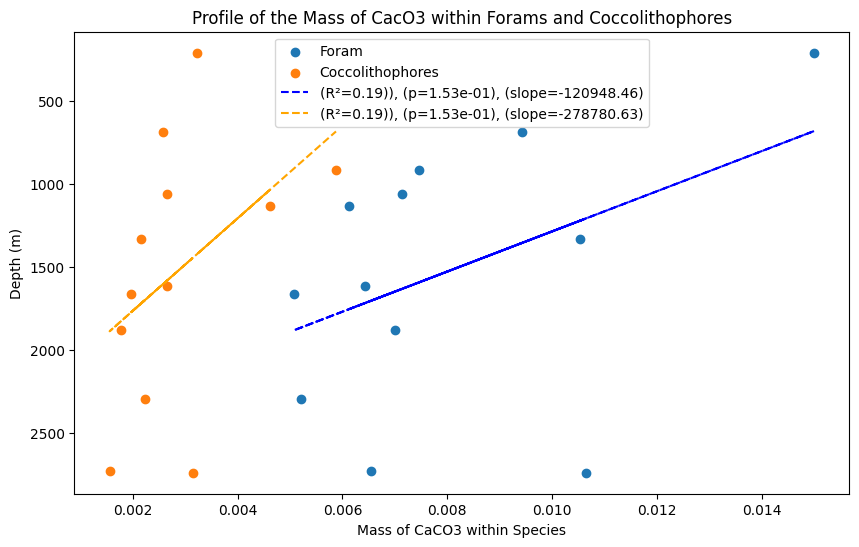

In [149]:
#foram fraction and cocco fraction vs depth 

plt.figure(figsize = (10,6))

plt.scatter(fm,z, label = 'Foram')
plt.scatter(cm,z, label = 'Coccolithophores')

plt.xlabel('Mass of CaCO3 within Species')
plt.ylabel('Depth (m)')
plt.title('Profile of the Mass of CacO3 within Forams and Coccolithophores')

# calulate linear regression
#foram
slopef, interceptf, r_valuef, p_valuef, std_errf = linregress(fm, z)
regression_yf = slopef * fm + interceptf
r_squaredf = r_valuef**2
#cocco
slopec, interceptc, r_valuec, p_valuec, std_errc = linregress(cm, z)
regression_yc = slopec * cm + interceptc
r_squaredc = r_valuec**2

#plot linear regression
#foram
plt.plot(fm, regression_yf, label=f'(R²={r_squaredf:.2f})), (p={p_valuef:.2e}), (slope={slopef:.2f})', color='b', linestyle='--')
#cocco
plt.plot(cm, regression_yc, label=f'(R²={r_squaredc:.2f})), (p={p_valuec:.2e}), (slope={slopec:.2f})', color='orange', linestyle='--')



plt.gca().invert_yaxis()
plt.legend()


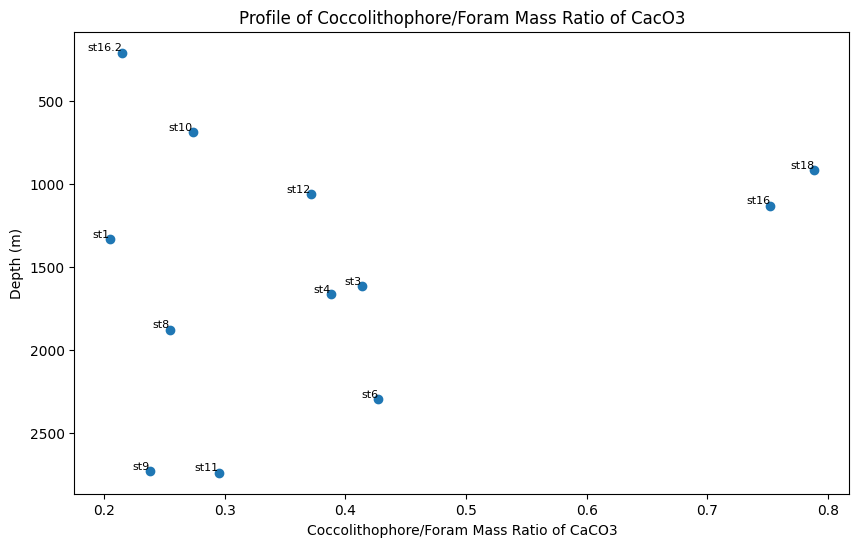

In [185]:
mratio = cm/fm

plt.figure(figsize = (10,6))

plt.scatter(mratio,z)

plt.xlabel('Coccolithophore/Foram Mass Ratio of CaCO3')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore/Foram Mass Ratio of CacO3')

# add station labels to each data point
for x, y, label in zip(mratio, z, st):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')


plt.gca().invert_yaxis()


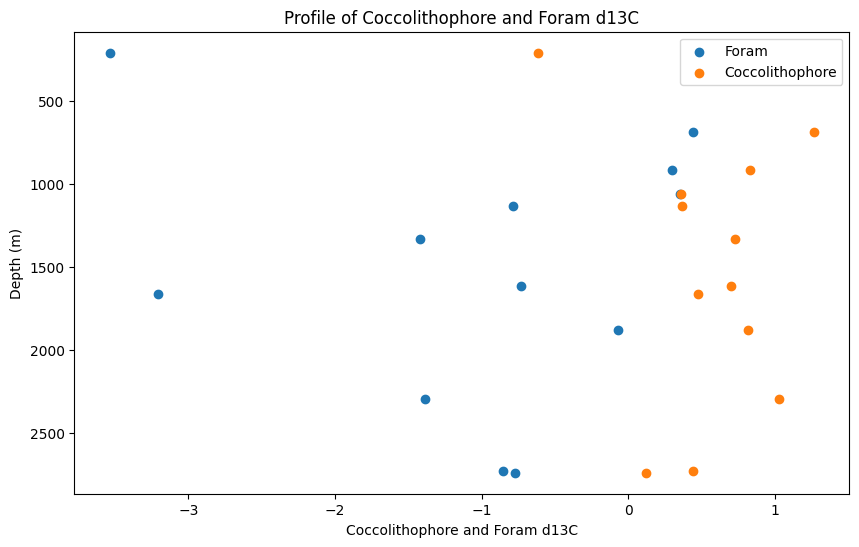

In [175]:


plt.figure(figsize = (10,6))

plt.scatter(fc,z, label='Foram')
plt.scatter(cc,z, label='Coccolithophore')

plt.xlabel('Coccolithophore and Foram d13C')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore and Foram d13C')


plt.gca().invert_yaxis()
plt.legend()

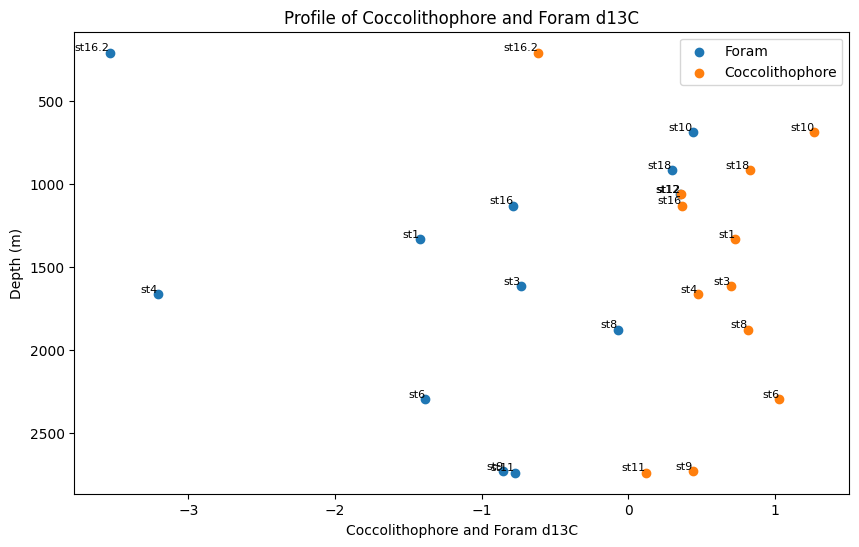

In [169]:


plt.figure(figsize = (10,6))

plt.scatter(fc,z, label='Foram')
plt.scatter(cc,z, label='Coccolithophore')

for x, y, label in zip(fc, z, st):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

for x, y, label in zip(cc, z, st):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.xlabel('Coccolithophore and Foram d13C')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore and Foram d13C')

plt.gca().invert_yaxis()
plt.legend()


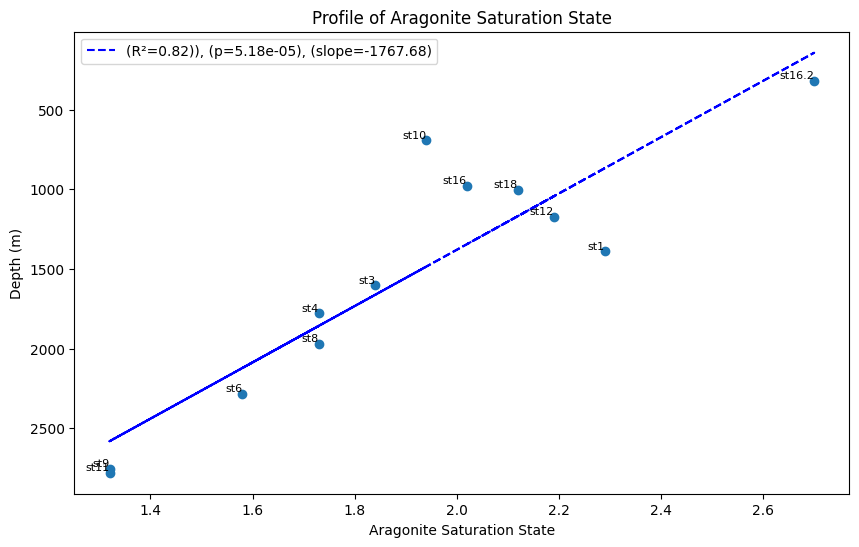

In [153]:
omegac = df['omega C']
d = df['depth .1']
st = df['station']



plt.figure(figsize=(10,6))

plt.scatter(omegac,d)

# add station labels to each data point
for x, y, label in zip(omegac, d, st):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

#calc linear regression
slopeo, intercepto, r_valueo, p_valueo, std_erro = linregress(omegac, d)
regression_yo = slopeo * omegac + intercepto
r_squaredo = r_valueo**2
#plot linear regression
plt.plot(omegac, regression_yo, label=f'(R²={r_squaredo:.2f})), (p={p_valueo:.2e}), (slope={slopeo:.2f})', color='b', linestyle='--')


plt.xlabel('Aragonite Saturation State')
plt.ylabel('Depth (m)')
plt.title('Profile of Aragonite Saturation State')

plt.gca().invert_yaxis()
plt.legend()